In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Feature Selection

In [ ]:
df = pd.read_csv("/content/sample_data/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


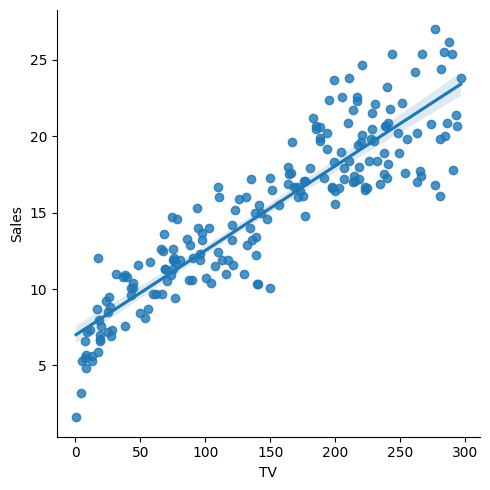

In [ ]:
sns.lmplot(x='TV',y='Sales',data=df) #lmplot is combination of scatterplot and line plot
plt.show()

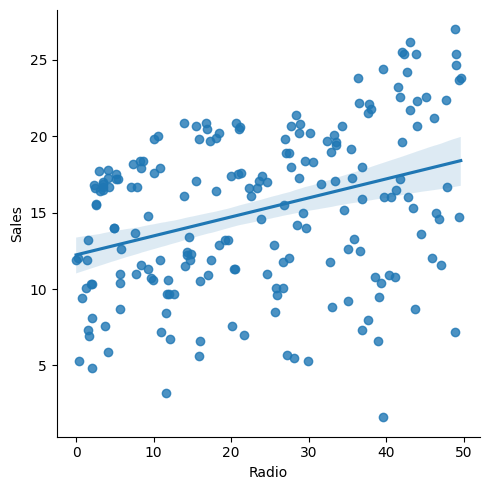

In [ ]:
sns.lmplot(x='Radio',y='Sales',data=df)
plt.show()

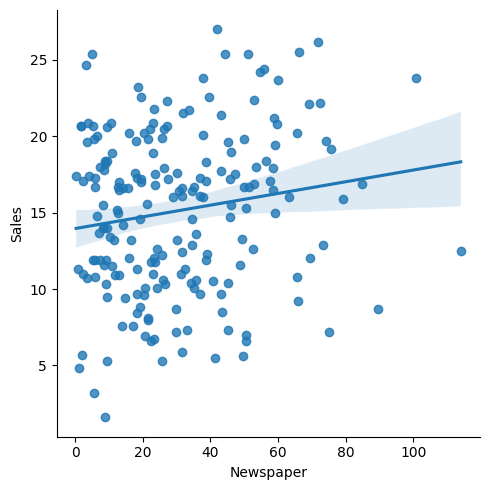

In [ ]:
sns.lmplot(x='Newspaper',y='Sales',data=df)
plt.show()

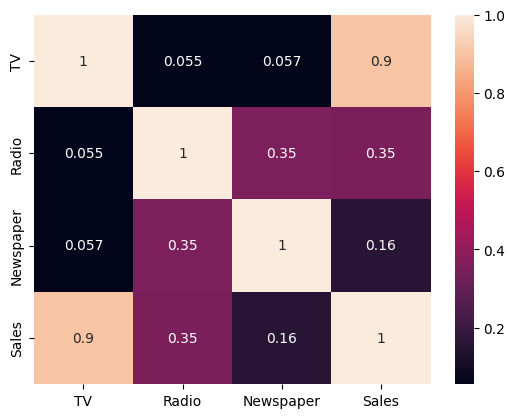

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop(columns=['Sales','Newspaper','Radio']) #Independent variable
y=df[['Sales']]    #dependent variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# 0.3 -- training data 70%, testing data 30%

In [ ]:
X_train.head()

,TV
169,284.3
97,184.9
31,112.9
12,23.8
35,290.7


In [ ]:
X_test.head()

,TV
95,163.3
15,195.4
30,292.9
158,11.7
128,220.3


In [ ]:
y_train.head()

,Sales
169,20.0
97,20.5
31,11.9
12,9.2
35,17.8


Model-1

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lrreg = LinearRegression()
lrreg.fit(X_train,y_train)


NameError: name 'LinearRegression' is not defined

In [ ]:
y_pred=lrreg.predict(X_test)


In [ ]:
lrreg.coef_

array([[0.05483488]])

In [ ]:
lrreg.intercept_

array([7.20655455])

sales=0.05483488*tv+7.20655455  -- model

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.814855389208679

Model-2

In [ ]:
x=df.drop(columns=['Sales','Radio']) #Independent variable
y=df[['Sales']]    #dependent variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
lrreg2=LinearRegression()
lrreg2.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lrreg2.predict(X_test)

In [ ]:
lrreg2.coef_

array([[0.05456838, 0.03260763]])

In [ ]:
lrreg2.intercept_

array([6.25539963])

sales=0.05456838*TV+6.25539963*Newspaper

In [ ]:
r2_score(y_test,y_pred)

0.8126810346822848

Model-3

In [ ]:
x=df.drop(columns=['Sales','Newspaper']) #Independent variable
y=df[['Sales']]    #dependent variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
lrreg3=LinearRegression()
lrreg3.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lrreg3.predict(X_test)

In [ ]:
lrreg3.coef_

array([[0.05360953, 0.10653078]])

In [ ]:
lrreg3.intercept_

array([4.89205004])

Sales=0.05456838+TV + 0.10653078 *Radio +4.89205004

In [ ]:
r2_score(y_test,y_pred)

0.9139189919346897

Model-4

In [ ]:
x=df.drop(columns=['Sales']) #Independent variable
y=df[['Sales']]    #dependent variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5


In [ ]:
lrreg4=LinearRegression()
lrreg4.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lrreg4.predict(X_test)

In [ ]:
lrreg4.coef_

array([[0.05358869, 0.10270677, 0.00793167]])

In [ ]:
lrreg4.intercept_

array([4.7437667])

Sales=0.05358869 * TV + 0.10270677 * Radio + 0.00793167 * Newspaper + 4.7437667